In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [60]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)

In [61]:
print("Training samples:", len(x_train))
print("Test samples:", len(x_test))

Training samples: 25000
Test samples: 25000


In [62]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2  # Unknown
word_index['<UNUSED>'] = 3  # Unused

def decode_review(encoded_review):
    reverse_word_index = {value: key for key, value in word_index.items()}
    return ' '.join([reverse_word_index.get(i, '<UNK>') for i in encoded_review])

In [63]:
for i in range(2):
    print(f"Review {i + 1}: {decode_review(x_train[i])}")
    print(f"Sentiment: {'Positive' if y_train[i] == 1 else 'Negative'}\n")

Review 1: <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be prais

In [64]:
x_train_pad = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=100)
x_test_pad = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=100)

In [65]:
model = keras.Sequential([
    layers.Embedding(input_dim=10000, output_dim=64, input_length=maxlen),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
history = model.fit(x_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 2s 3ms/step - loss: 0.4684 - accuracy: 0.7962 - val_loss: 0.3499 - val_accuracy: 0.8416
Epoch 2/5
625/625 [==============================] - 2s 4ms/step - loss: 0.2708 - accuracy: 0.8889 - val_loss: 0.3371 - val_accuracy: 0.8516
Epoch 3/5
625/625 [==============================] - 2s 4ms/step - loss: 0.2127 - accuracy: 0.9178 - val_loss: 0.3599 - val_accuracy: 0.8494
Epoch 4/5
625/625 [==============================] - 2s 4ms/step - loss: 0.1768 - accuracy: 0.9362 - val_loss: 0.3959 - val_accuracy: 0.8438
Epoch 5/5
625/625 [==============================] - 2s 4ms/step - loss: 0.1490 - accuracy: 0.9469 - val_loss: 0.4459 - val_accuracy: 0.8330


In [67]:
test_loss, test_accuracy = model.evaluate(x_test_pad, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

782/782 [==============================] - 0s 426us/step - loss: 0.4587 - accuracy: 0.8328
Test Loss: 0.4587
Test Accuracy: 0.8328


In [68]:
y_pred_probs = model.predict(x_test_pad)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

782/782 [==============================] - 0s 377us/step


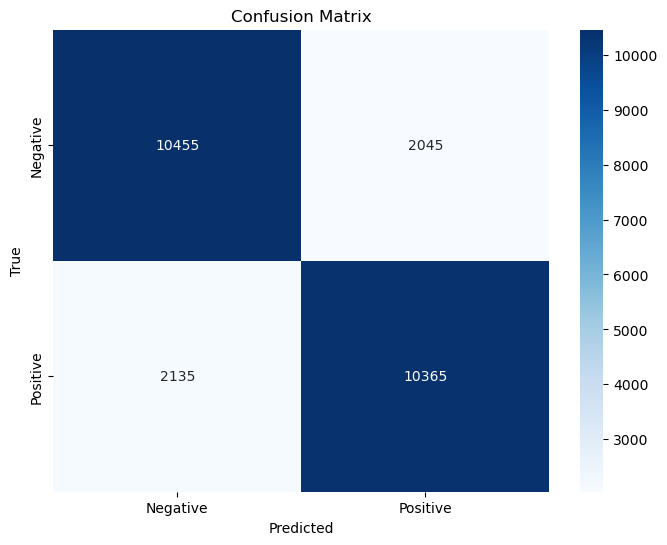

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     12500
           1       0.84      0.83      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



In [69]:
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(class_report)

In [70]:
model.save('./models/sentiment_analysis_model.h5')